In [1]:
import numpy as np
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

# For multiprocessing
import multiprocess as mp
from itertools import repeat
from datetime import datetime

In [2]:
df = pd.read_csv('Data/newsgroups.csv')

In [3]:
data = pd.read_csv('Data/newsgroups.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4663 entries, 0 to 4662
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         4663 non-null   object
 1   target       4663 non-null   int64 
 2   target_name  4663 non-null   object
dtypes: int64(1), object(2)
memory usage: 109.4+ KB


In [5]:
# Check missing data
df.isnull().sum()

text           0
target         0
target_name    0
dtype: int64

In [6]:
# Check duplicates
df.duplicated().sum()

0

In [7]:
# Print some rows
df.head()

,text,target,target_name
0,From: eder@hsvaic.boeing.com (Dani Eder)\nSubj...,3,sci.space
1,"From: MUNIZB%RWTMS2.decnet@rockwell.com (""RWTM...",3,sci.space
2,From: jfc@athena.mit.edu (John F Carr)\nSubjec...,2,rec.sport.baseball
3,From: gnb@leo.bby.com.au (Gregory N. Bond)\nSu...,3,sci.space
4,Organization: University of Illinois at Chicag...,4,talk.politics.guns


In [8]:
df.tail()

,text,target,target_name
4658,From: prb@access.digex.net (Pat)\nSubject: Shu...,3,sci.space
4659,From: mangoe@cs.umd.edu (Charley Wingate)\nSub...,0,alt.atheism
4660,From: car@trux.mi.org (Chris Rende)\nSubject: ...,1,comp.graphics
4661,From: loss@fs7.ECE.CMU.EDU (Doug Loss)\nSubjec...,3,sci.space
4662,From: thornley@micro.cs.umn.edu (David H. Thor...,2,rec.sport.baseball


In [9]:
# Change the column's name from 'text' to 'content' in order to run df_dask.compute later.
df.rename(columns = {'text':'content'}, inplace = True)

### Clean the text

In [10]:
import dask
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
from dask.distributed import Client, LocalCluster

In [11]:
cluster = LocalCluster()
client = Client(cluster)
dask.config.set(scheduler='multiprocessing')

In [12]:
from myhelpers import text_cleaner

In [13]:
df_dask = dd.from_pandas(df, npartitions=16)
df_dask = df_dask.map_partitions(text_cleaner.simple_text_clean)

In [14]:
# Convert to pandas
with ProgressBar():
    df = df_dask.compute(num_workers=8)
        
del df_dask

[########################################] | 100% Completed | 32.40 s


In [15]:
df.head()

,content,target,target_name
0,dani eder subject vandalize sky organization b...,3,sci.space
1,munizb munizb subject space event near los ang...,3,sci.space
2,john f carr subject propose catcher sub rule o...,2,rec.sport.baseball
3,gregory n bond subject give billion first year...,3,sci.space
4,organization university illinois chicago acade...,4,talk.politics.guns


### Use Count Vectorizer

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
vectorizer = CountVectorizer(max_features=5000)

In [18]:
vectorizer.fit(df['content'])

CountVectorizer(max_features=5000)

In [19]:
X = vectorizer.transform(df['content'])

In [20]:
df_new = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

In [21]:
df_new.head(20)

,aa,aaa,aaron,ab,abandon,abc,abide,ability,able,abomination,...,york,young,yount,youth,zealand,zero,zip,zone,zoology,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df_new.shape

(4663, 5000)

In [23]:
class_dictionary = {
    'alt.atheism': 0,
    'comp.graphics': 1,
    'rec.sport.baseball': 2,
    'sci.space': 3,
    'talk.politics.guns': 4
}

In [24]:
y = df['target_name'].map(class_dictionary)

In [25]:
y.head()

0    3
1    3
2    2
3    3
4    4
Name: target_name, dtype: int64

### Use Naive Bayes Classifier

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size=0.2, random_state=42)

In [28]:
clf = MultinomialNB()

In [29]:
clf.fit(X_train, y_train)

MultinomialNB()

In [30]:
print('Accuracy on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy on training set: 0.98
Accuracy on test set: 0.97


In [31]:
from sklearn.metrics import classification_report

In [32]:
y_pred = clf.predict(X_test)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       168
           1       0.95      0.95      0.95       211
           2       0.99      0.98      0.99       193
           3       0.96      0.96      0.96       195
           4       0.98      0.98      0.98       166

    accuracy                           0.97       933
   macro avg       0.97      0.97      0.97       933
weighted avg       0.97      0.97      0.97       933



In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
confusion_matrix(y_test, y_pred)

array([[162,   2,   0,   3,   1],
       [  3, 201,   2,   3,   2],
       [  2,   1, 190,   0,   0],
       [  0,   7,   0, 188,   0],
       [  0,   1,   0,   2, 163]], dtype=int64)

In [36]:
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

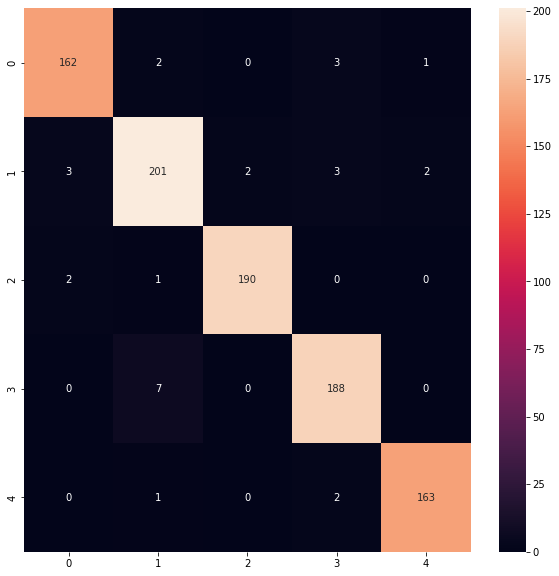

In [37]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d')

### Use TF-IDF Vectorizer

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=0.02)

In [40]:
vectorizer.fit(df['content'])

TfidfVectorizer(min_df=0.02, ngram_range=(1, 2))

In [41]:
X = vectorizer.transform(df['content'])

In [42]:
df_new = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

In [43]:
pd.options.display.float_format = '{:,.4f}'.format

In [44]:
df_new.head()

,ability,able,accept,access,accord,account,across,act,action,activity,...,writes,writes article,wrong,yeah,year,year ago,yes,yet,york,young
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0332,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.2240,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.1292,0.0000,0.0000,0.0000,0.0000,0.2178
4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


### Use KMeans Clustering

In [45]:
from sklearn.cluster import KMeans

In [46]:
MIN_K = 2
MAX_K = 9
K = range(MIN_K, MAX_K + 1)

In [47]:
def kmean_test(df, k):
    from sklearn.cluster import KMeans
    from sklearn import metrics

    kmeanModel = KMeans(n_clusters=k, n_init=20, max_iter=1000, random_state=42)
    kmeanModel.fit(df)

    return (kmeanModel.inertia_,
            metrics.silhouette_score(df, kmeanModel.labels_, metric='euclidean'),
            kmeanModel)

In [48]:
start_time = datetime.now()
a_pool = mp.Pool(processes = (MAX_K - MIN_K + 1))
results = a_pool.starmap(kmean_test, zip(repeat(df_new), K))
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
a_pool.close()

Duration: 0:00:33.129488


In [49]:
kmeans_distortions = []
kmeans_silhouettes = {}
kmean_models = {}
for ret in results:
    kmeans_distortions.append(ret[0])
    kmeans_silhouettes[ret[2].n_clusters] = ret[1]
    kmean_models[ret[2].n_clusters] = ret[2]

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

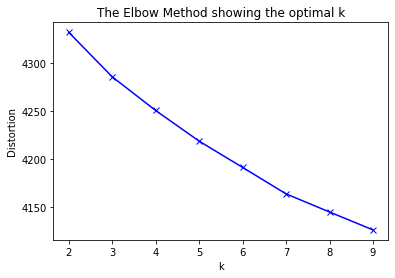

In [50]:
plt.plot(K, kmeans_distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

Text(0, 0.5, 'Silhouette score')

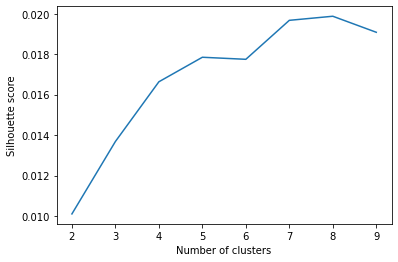

In [51]:
# Plot the silhouette graph
plt.plot(K, kmeans_silhouettes.values())
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

In [52]:
from myhelpers import silhouette_plot

For n_clusters = 2 The average silhouette_score is : 0.010101704974630978
For n_clusters = 3 The average silhouette_score is : 0.013682760978017126
For n_clusters = 4 The average silhouette_score is : 0.016635954651966805
For n_clusters = 5 The average silhouette_score is : 0.0178487581683995
For n_clusters = 6 The average silhouette_score is : 0.017747046992392452
For n_clusters = 7 The average silhouette_score is : 0.0196745439572798
For n_clusters = 8 The average silhouette_score is : 0.01987657183842472
For n_clusters = 9 The average silhouette_score is : 0.01908369589599543


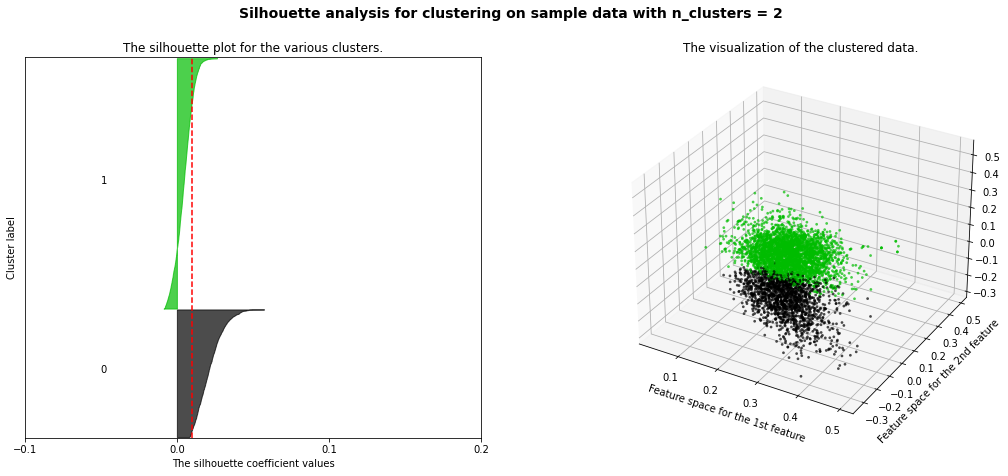

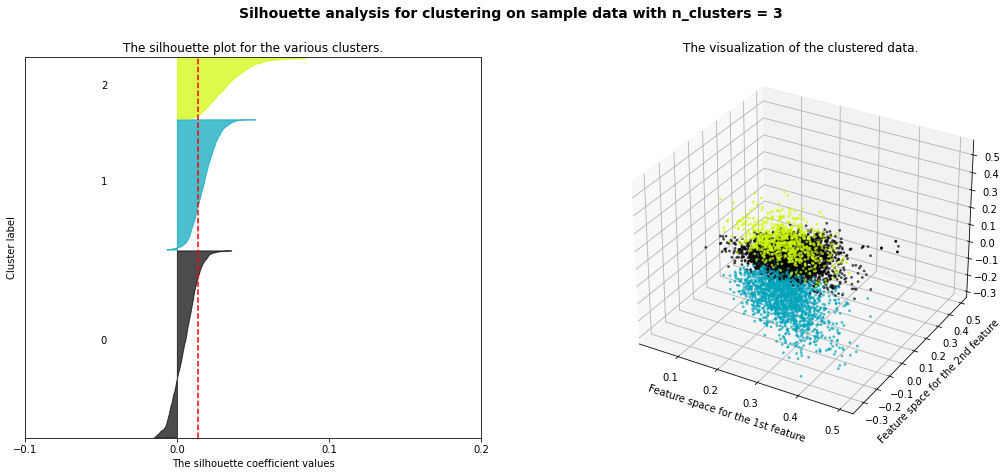

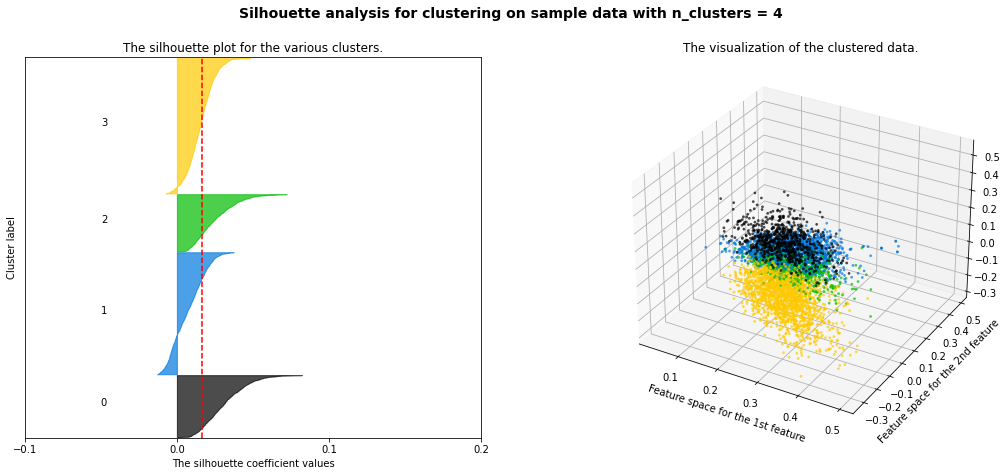

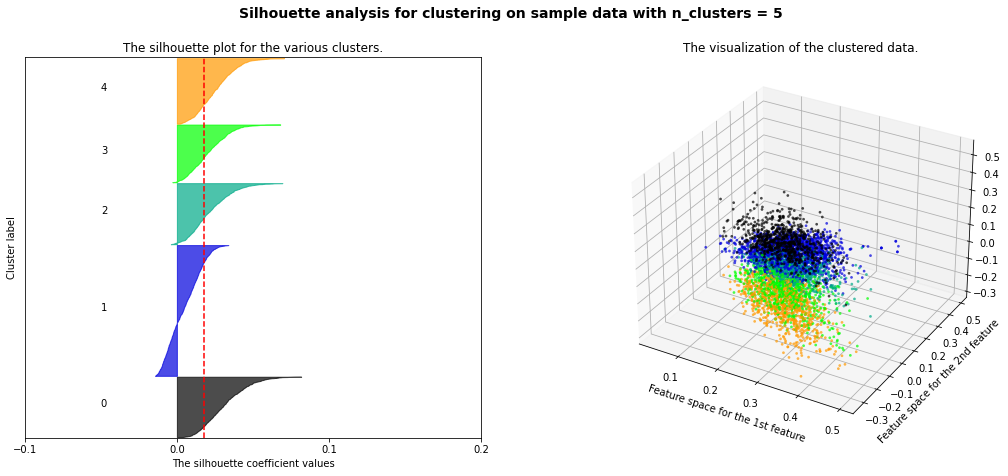

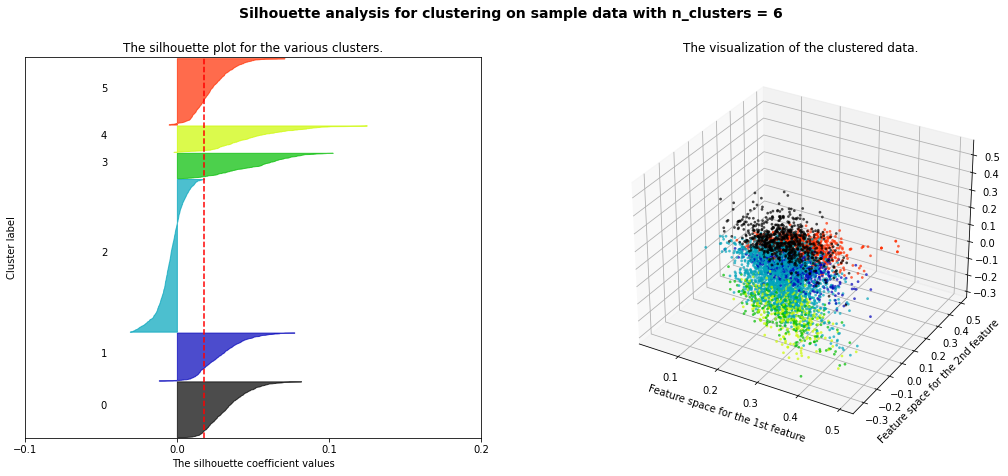

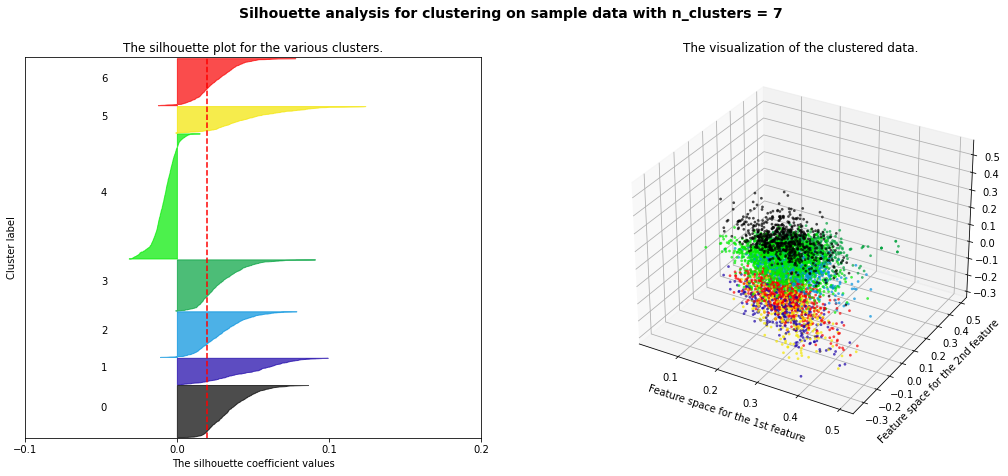

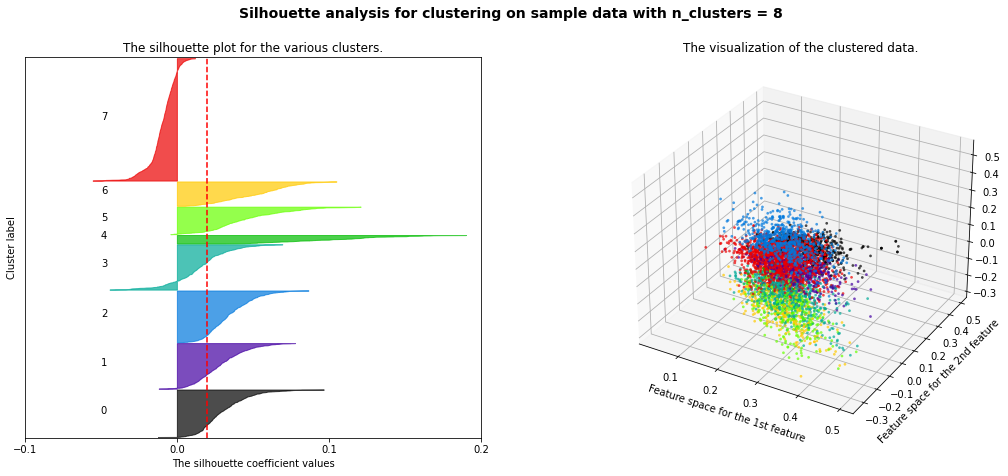

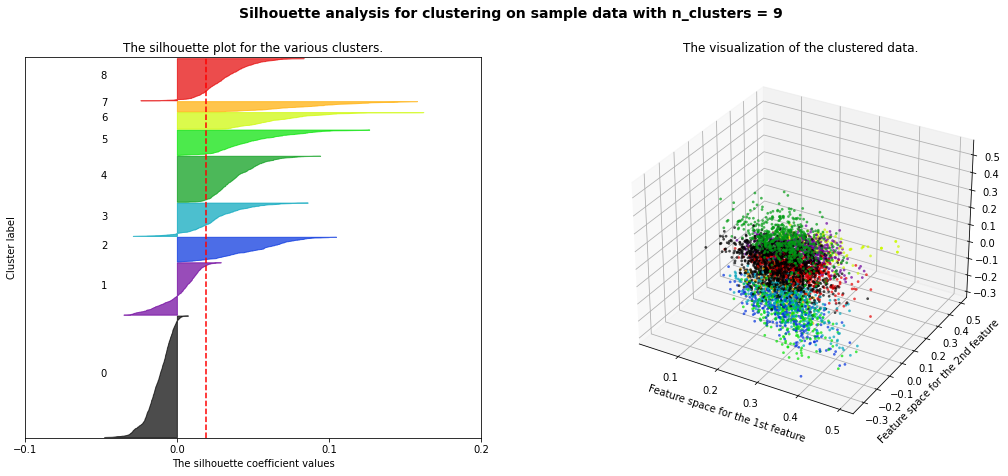

In [53]:
silhouette_plot.silhouette_plot(MAX_K, df_new, kmean_models, kmeans_silhouettes)

### Use KMeans Clustering with K=5

In [54]:
kmeans = KMeans(n_clusters=5, random_state=42)

In [55]:
kmeans.fit(df_new)

KMeans(n_clusters=5, random_state=42)

In [56]:
df_kmeans = df_new.copy()
df_kmeans['cluster_'] = kmeans.labels_

In [57]:
df_kmeans.head(20)

,ability,able,accept,access,accord,account,across,act,action,activity,...,writes article,wrong,yeah,year,year ago,yes,yet,york,young,cluster_
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0332,0.0000,0.0000,0.0000,0.0000,0.0000,2
2,0.2240,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.1292,0.0000,0.0000,0.0000,0.0000,0.2178,2
4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4
5,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0719,0.0000,0.0000,0.0000,0.0000,0.0000,0
6,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.1711,0.0000,0.0000,0.0000,0.0000,0.0000,2
7,0.0000,0.0398,0.0471,0.0000,0.0000,0.0000,0.0000,0.0468,0.0000,0.0000,...,0.0437,0.0779,0.0000,0.1993,0.0000,0.0000,0.0388,0.0000,0.0000,2
8,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2
9,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0410,0.0000,0.0000,0.0000,0.0000,0.0000,0


### Word Cloud for each cluster

In [58]:
from wordcloud import WordCloud

In [59]:
# Create a list of words for each cluster
cluster_0 = df_kmeans[df_kmeans['cluster_'] == 0].drop('cluster_', axis=1).sum().sort_values(ascending=False)
cluster_1 = df_kmeans[df_kmeans['cluster_'] == 1].drop('cluster_', axis=1).sum().sort_values(ascending=False)
cluster_2 = df_kmeans[df_kmeans['cluster_'] == 2].drop('cluster_', axis=1).sum().sort_values(ascending=False)
cluster_3 = df_kmeans[df_kmeans['cluster_'] == 3].drop('cluster_', axis=1).sum().sort_values(ascending=False)
cluster_4 = df_kmeans[df_kmeans['cluster_'] == 4].drop('cluster_', axis=1).sum().sort_values(ascending=False)

In [60]:
# Create a word cloud for each cluster
wordcloud_0 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(cluster_0)
wordcloud_1 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(cluster_1)
wordcloud_2 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(cluster_2)
wordcloud_3 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(cluster_3)
wordcloud_4 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(cluster_4)

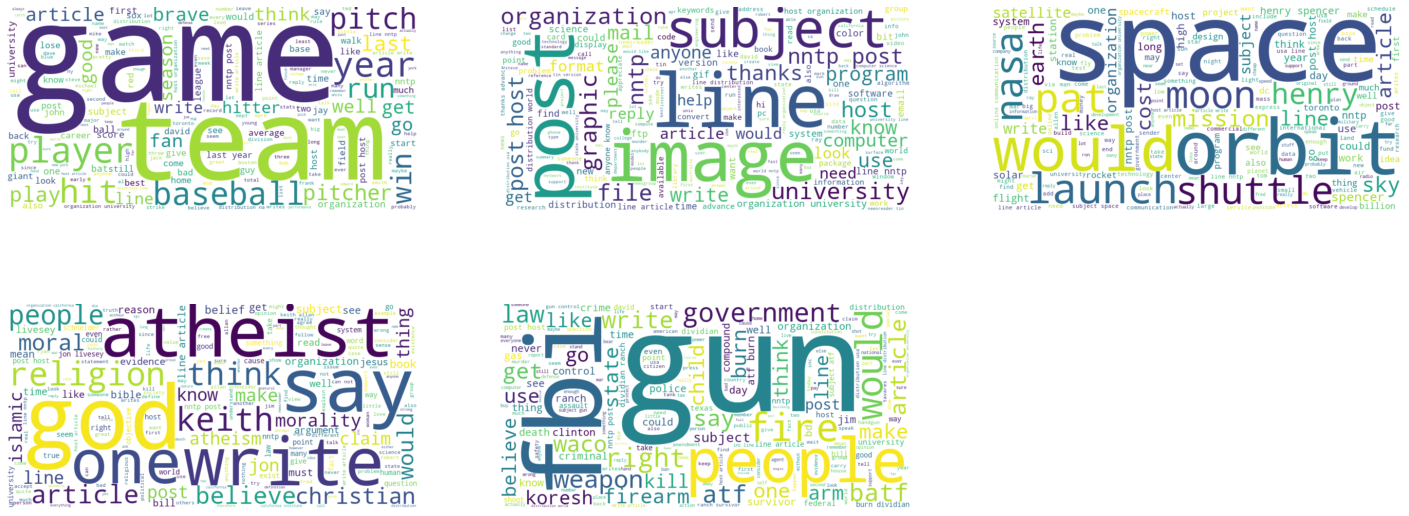

In [61]:
# Plot the word cloud
plt.figure(figsize=(25, 10))
plt.subplot(231)
plt.imshow(wordcloud_0, interpolation='bilinear')
plt.axis('off')
plt.subplot(232)
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.axis('off')
plt.subplot(233)
plt.imshow(wordcloud_2, interpolation='bilinear')
plt.axis('off')
plt.subplot(234)
plt.imshow(wordcloud_3, interpolation='bilinear')
plt.axis('off')
plt.subplot(235)
plt.imshow(wordcloud_4, interpolation='bilinear')
plt.axis('off')
plt.show()

##### Comment
Cụm 1: rec.sport.baseball, keywords: game, team,...  
Cụm 2: comp.graphics, keywords: image, post, line,...  
Cụm 3: sci.space, keywords: space, orbit, moon,...  
Cụm 4: alt.atheism, keywords: atheist, write, god,...  
Cụm 5: talk.politics.guns, keywords: gun, fbi,...